In [ ]:
'''
s0= Current price
mu = mean returns
sigma = standard dviation of returns
steps = no of steps inb each path
T = length of each path
No_of_paths = no of paths
'''
import numpy as np
def gbm(s0,mu,sigma,steps,T,No_of_paths):
  paths=[]
  dt=T/steps
  for path in range(No_of_paths):
    prices=[s0]
    for step in range(steps):
      prices.append(prices[-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*np.random.normal(0,np.sqrt(dt))))
    paths.append(prices)
  return paths

print(gbm(100,.10,.5,5,10,3))



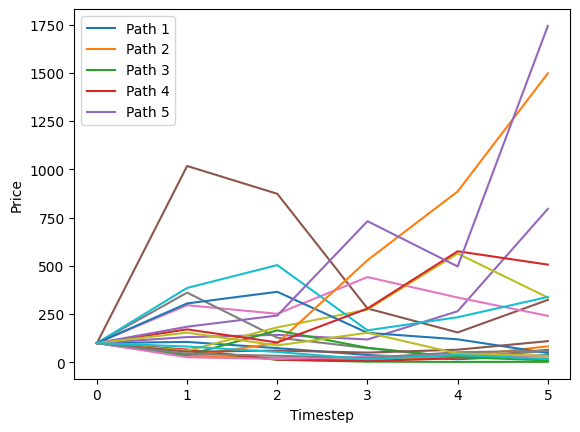

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.array(gbm(100,.10,.5,5,10,20)).T.tolist())
plt.xlabel('Timestep')
plt.ylabel('Price')
plt.legend(['Path 1', 'Path 2', 'Path 3', 'Path 4', 'Path 5'])
plt.show()